<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/RDF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00


In [40]:
import random
from rdflib import Graph, Namespace, Literal

In [48]:
import random

colleagues = ["srishti", "parth", "satyam", "rounak", "pranab", "balaji", "sai", "pritam", "hareesh", "saurav"]
projects = ["kg", "nixx", "litigation"]
# Create an RDF graph
g = Graph()

# Define namespaces for commonly used URIs
ex = Namespace("http://example.org/")

# Generate random triplets
for colleague in colleagues:

    # Randomly select a manager (reports to relationship)

    manager = random.choice(colleagues)
    while manager == colleague:
        manager = random.choice(colleagues)
    # Colleague works with another random colleague
    work_with = random.choice(colleagues)
    while work_with == colleague:
        work_with = random.choice(colleagues)
    # Colleague sits beside another random colleague
    sit_beside = random.choice(colleagues)
    while sit_beside == colleague:
        sit_beside = random.choice(colleagues)
    project=random.choice(projects)
    while project==colleague:
      project=random.choice(projects)


    # Add triples to the graph
    g.add((ex[colleague], ex["reports_to"], ex[manager]))
    g.add((ex[colleague], ex["works_with"], ex[work_with]))
    g.add((ex[colleague], ex["sits_beside"], ex[sit_beside]))
    g.add((ex[colleague], ex["working_on"], ex[project]))



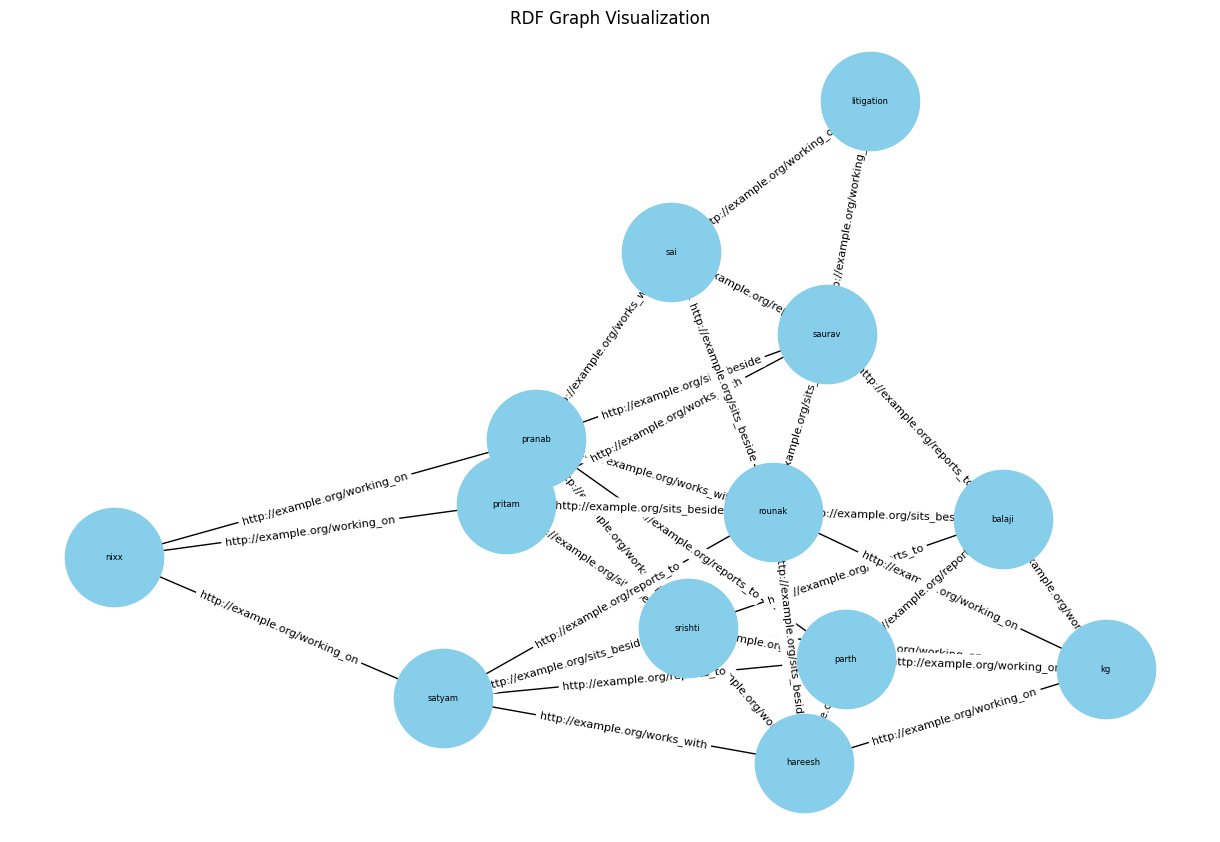

In [49]:
nx_graph = nx.Graph()

# Iterate through RDF triples and add nodes and edges to the NetworkX graph
for subject, predicate, obj in g:
    nx_graph.add_node(subject)
    nx_graph.add_node(obj)
    nx_graph.add_edge(subject, obj, label=predicate)

# Visualize the graph using NetworkX and Matplotlib
pos = nx.spring_layout(nx_graph)
labels = {node: node.split("/")[-1] for node in nx_graph.nodes()}  # Use short labels
edge_labels = {(source, target): data["label"] for source, target, data in nx_graph.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(nx_graph, pos, with_labels=True, labels=labels, node_size=5000, node_color="skyblue", font_size=6)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)
plt.title("RDF Graph Visualization")
plt.axis("off")
plt.show()


In [50]:
from rdflib.plugins.sparql import prepareQuery

query = prepareQuery("""
    SELECT ?s ?p ?o
    WHERE {        ?s ?p ?o .
    }
""")

# Execute the query and print results
for row in g.query(query):
    print(row)

(rdflib.term.URIRef('http://example.org/pranab'), rdflib.term.URIRef('http://example.org/works_with'), rdflib.term.URIRef('http://example.org/srishti'))
(rdflib.term.URIRef('http://example.org/hareesh'), rdflib.term.URIRef('http://example.org/working_on'), rdflib.term.URIRef('http://example.org/kg'))
(rdflib.term.URIRef('http://example.org/parth'), rdflib.term.URIRef('http://example.org/sits_beside'), rdflib.term.URIRef('http://example.org/srishti'))
(rdflib.term.URIRef('http://example.org/balaji'), rdflib.term.URIRef('http://example.org/sits_beside'), rdflib.term.URIRef('http://example.org/srishti'))
(rdflib.term.URIRef('http://example.org/pritam'), rdflib.term.URIRef('http://example.org/works_with'), rdflib.term.URIRef('http://example.org/balaji'))
(rdflib.term.URIRef('http://example.org/balaji'), rdflib.term.URIRef('http://example.org/works_with'), rdflib.term.URIRef('http://example.org/rounak'))
(rdflib.term.URIRef('http://example.org/sai'), rdflib.term.URIRef('http://example.org/r